In [10]:
import numpy as np
import matplotlib as plt
import pandas as pd
import scipy as sp

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
!pip install seaborn

In [3]:
df = pd.read_excel('test_main_2_0.xlsx', index_col=0)

In [ ]:
df.to_excel('test_main_2_0.xlsx')

In [35]:
print(list(df))

['data_game', 'time_match', 'name_champ', 'Команда_1', 'Команда_2', 'kef_1', 'kef_2', 'tot', 'fora', 'tot_ch', 'tot_ind_1', 'tot_ind_2', 't_i_onq_1', 't_i_onq_2', 'favorite', 'in_list', 'a11', 'a12', 'a13', 'a14', 'a31', 'a41', 'a42', 'record_1', 'sc1_1t', 'sc1_2t', 'tot1', 'diff_tot1-tot', 'winner_1', 'kef_1_on_2q', 'kef_2_on_2q', 'tot_on_2', 'разн с начал', 'kef_bet_on2', 'record_2', 'sc1_in_q2', 'sc2_in_q2', 'tot_in_2_on_2', 'record_3', 'sc2_1t', 'sc2_2t', 'tot2', 'diff_tot2-tot', 'сред_откл_после_2ч', 'winner_2', 'kef_1_on_3q', 'kef_2_on_3q', 'tot_on_3', 'разн с начал после 2ч', 'kef_bet_on3', 'tot_hf', 'kef_bet_hf_TB', 'kef_bet_hf_TM', 'record_4', 'sc1_in_q3', 'sc2_in_q3', 'ABS_in_3q', 'tot_in_3_on_3', 'kef_in3_on3', 'record_5', 'sc3_1t', 'sc3_2t', 'tot3', 'diff_tot3-tot', 'diff_tot3-to3', 'winner_3', 'sc_aft_3q', 'sc_af_3q_1', 'sc_af_3q_2', 'ABS_aft_3q', 'tot_after_3q', 'diff_ta3-tot', 'tot_on_4', 'record_6', 'sc1_in_q4', 'sc2_in_q4', 'ABS_sc_q4', 'tot_in_4_on_game', 'raz_tot_4q-

In [34]:
df.insert(df.columns.get_loc('tot_fin') + 1, 'diff_totfin_tot', '')

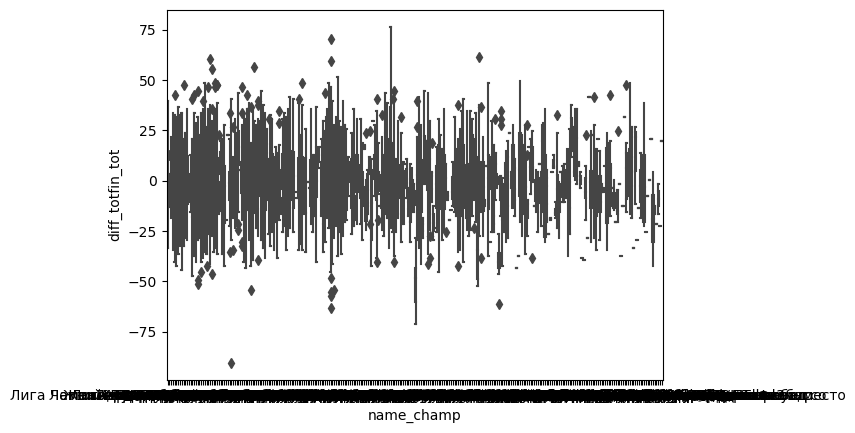

In [97]:
sns.boxplot(x='name_champ', y='diff_totfin_tot', data=df);

In [90]:
df[df['Команда_1'].isin(df['Команда_1'].value_counts().head().index)]['Команда_1']

Реал Мадрид — Барселона             Реал Мадрид
Олимпия Милан — Тревизо           Олимпия Милан
Фенербахче — Чагдаш Бодрумспор       Фенербахче
Олимпиакос — Панатинаикос            Олимпиакос
Фенербахче — Олимпия Милан           Фенербахче
                                      ...      
Реал Мадрид — Анадолу Эфес          Реал Мадрид
Валенсия — Панатинаикос                Валенсия
Фенербахче — Партизан Белград        Фенербахче
Олимпия Милан — Альба Берлин      Олимпия Милан
Валенсия — Жальгирис                   Валенсия
Name: Команда_1, Length: 62, dtype: object

# печать по первым значениям

In [91]:
df[df['Команда_1'].isin(df['Команда_1'].value_counts().head().index)]['Команда_1']

Реал Мадрид — Барселона             Реал Мадрид
Олимпия Милан — Тревизо           Олимпия Милан
Фенербахче — Чагдаш Бодрумспор       Фенербахче
Олимпиакос — Панатинаикос            Олимпиакос
Фенербахче — Олимпия Милан           Фенербахче
                                      ...      
Реал Мадрид — Анадолу Эфес          Реал Мадрид
Валенсия — Панатинаикос                Валенсия
Фенербахче — Партизан Белград        Фенербахче
Олимпия Милан — Альба Берлин      Олимпия Милан
Валенсия — Жальгирис                   Валенсия
Name: Команда_1, Length: 62, dtype: object

In [59]:
df[(df['diff_ta3-tot']>10)&(df['ABS_aft_3q']<10)] ['diff_tf-to3'].describe()


count    681.000000
mean      -1.784875
std        7.946765
min      -45.500000
25%       -6.500000
50%       -2.500000
75%        3.500000
max       23.500000
Name: diff_tf-to3, dtype: float64

## удаление строки с пустым значением

In [39]:
df = df.dropna(subset=['tot_fin'])


In [40]:
for index, row in df.iterrows():
    try:
       df.at[index, 'diff_totfin_tot'] = float(row['tot_fin']) - float(row['tot'])

        
#         row['diff_tf-to3']
        # df.at[index, 'Команда_2'] = df.index.str.split(' — ').str[1]
        
    except:
        None

In [16]:
# for index in df.index:
for index, row in df.iterrows():
    a = index.split(" — ")
    df.at[index, 'Команда_1'] = a[0]
    df.at[index, 'Команда_2'] = a[1]
    
    print(index, a[0], a[1])

Минск — Пари Нижний Новгород Минск Пари Нижний Новгород
Руна — Автодор Руна Автодор
Япония (ж) — Филиппины (ж) Япония (ж) Филиппины (ж)
Казахстан (ж) — Гонконг (ж) Казахстан (ж) Гонконг (ж)
Китай (ж) — Индия (ж) Китай (ж) Индия (ж)
Индонезия (ж) — Монголия (ж) Индонезия (ж) Монголия (ж)
Шоле — Бриндизи Шоле Бриндизи
Борац Чачак — Цибона Борац Чачак Цибона
Ховентут Бадалона — Гран Канария Ховентут Бадалона Гран Канария
Гранада — Жирона Гранада Жирона
Бреоган — Манреса Бреоган Манреса
Андорра — Паленсия Андорра Паленсия
Реал Мадрид — Барселона Реал Мадрид Барселона
Рейер Венеция — Дертона Рейер Венеция Дертона
Брешиа — Виктория Либертас Брешиа Виктория Либертас
Сассари — Наполи Баскет Сассари Наполи Баскет
Олимпия Милан — Тревизо Олимпия Милан Тревизо
Синтайникс МБК — Брауншвейг Синтайникс МБК Брауншвейг
Раста Вехта — Телеком Бонн Раста Вехта Телеком Бонн
Гамбург — Вюрцбург Гамбург Вюрцбург
Тюбинген — Ратиофарм Ульм Тюбинген Ратиофарм Ульм
Росток Сиавулвс — Хайдельберг Росток Сиавулвс Ха

In [18]:
df[(df['kef_1'] <1.5) & (df['diff_ta3-tot'] > 10)]


,data_game,time_match,name_champ,Команда_1,Команда_2,kef_1,kef_2,tot,fora,tot_ch,...,winner_4,score_fin,sc1_fin,sc2_fin,tot_fin,diff_tf-to3,winner_game,raz_tf-t4q,record_8,result_TM_af3q
Сассари — Наполи Баскет,01.10.2023,18:30,Италия. Серия А,Сассари,Наполи Баскет,1.44,2.80,164.5,5.0,41.1,...,1,90:111,90,111,201,11.5,2,NaN,1,
Сеси Франка — Пинейрос,13.11.2023,02:00,Бразилия. NBB,Сеси Франка,Пинейрос,1.13,5.10,164.5,11.0,41.1,...,1,85:88,85,88,173,-3.5,2,NaN,1,
Пьяченца — РивераБанка Римини,01.10.2023,19:00,Италия. Серия А2,Пьяченца,РивераБанка Римини,1.42,2.65,153.5,5.0,38.4,...,2,86:78,86,78,164,-4.5,1,NaN,1,
БК Лиепая — Латвийский Университет,01.10.2023,17:00,Латвийско-Эстонская Баскетбольная Лига,БК Лиепая,Латвийский Университет,1.21,3.90,151.5,8.0,37.9,...,1,92:70,92,70,162,-14.5,1,NaN,1,
Пенанг Санрайз Янгстерс U23 — Тунгсан U23,NaN,NaN,NaN,Пенанг Санрайз Янгстерс U23,Тунгсан U23,1.27,3.40,140.5,7.0,35.1,...,2,70:66,70,66,136,-16.5,1,NaN,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Вентспилс — Латвийский Университет,09.01.2024,20:00,Латвийско-Эстонская Баскетбольная Лига,Вентспилс,Латвийский Университет,1.01,12.00,163.5,20.5,40.9,...,0,103:81,103,81,184,4.5,1,-4.5,1,
Хапоэль Тель-Авив — Лондон Лайонс,09.01.2024,20:30,Еврокубок ULEB,Хапоэль Тель-Авив,Лондон Лайонс,1.44,2.80,181.5,5.5,45.4,...,1,96:100,96,100,196,0.5,2,-1.5,1,
Сан-Лоренцо де Альмагро U23 — Аргентино Хунин U23,09.01.2024,22:00,Аргентина. Liga de Desarrollo,Сан-Лоренцо де Альмагро U23,Аргентино Хунин U23,1.42,2.65,147.5,5.5,36.9,...,1,91:76,91,76,167,-10.5,1,-0.5,1,
Триест 2004 U19 — Виченца U19,09.01.2024,NaN,New,Триест 2004 U19,Виченца U19,1.35,2.90,134.5,6.5,33.6,...,2,94:86,94,86,180,6.5,1,1.5,1,


In [9]:
df.head()

,data_game,time_match,name_champ,Команда_1,Команда_2,kef_1,kef_2,tot,fora,tot_ch,...,diff_tot4-to4,winner_4,score_fin,sc1_fin,sc2_fin,tot_fin,diff_tf-to3,winner_game,raz_tf-t4q,record_8
Минск — Пари Нижний Новгород,01.10.2023,14:00,Лига ВТБ,Минск,Пари Нижний Новгород,7.00,1.10,150.5,16.0,37.6,...,3.5,1,60:89,60,89,149,3.5,2,NaN,1
Руна — Автодор,01.10.2023,16:00,Лига ВТБ,Руна,Автодор,1.60,2.35,160.5,4.0,40.1,...,-7.5,2,87:79,87,79,166,-7.5,1,NaN,1
Япония (ж) — Филиппины (ж),01.10.2023,12:30,Жен. Азиатские Игры. Китай,Япония (ж),Филиппины (ж),1.80,1.90,151.5,3.0,37.9,...,14.5,1,96:59,96,59,155,14.5,1,NaN,1
Казахстан (ж) — Гонконг (ж),01.10.2023,12:30,Жен. Азиатские Игры. Китай,Казахстан (ж),Гонконг (ж),1.25,3.55,130.5,7.0,32.6,...,2.5,2,56:70,56,70,126,2.5,2,NaN,1
Китай (ж) — Индия (ж),01.10.2023,15:00,Жен. Азиатские Игры. Китай,Китай (ж),Индия (ж),1.85,1.85,151.5,3.0,37.9,...,-2.5,1,111:53,111,53,164,-2.5,1,NaN,1
